In [14]:
def find_max_abs(Z):
    ZZ = []
    for i in range(len(Z)):
        ZZ.append(abs(Z[i]))
    return max(ZZ)

#y = 1/(1+e^(kx+b))
def func(k, b, x):
    return 1/(1+np.exp(k*x+b))

In [96]:
def find_MSE(x, y):

    #начальный прогноз
    k1 = -1.0
    b1 = -1.0
    #y = 1/(1+e^(kx+b))
    
    #шаг выбирается,чтобы метод сходился
    alpha = 0.1/max(find_max_abs(x), find_max_abs(y))
    #погрешность
    e = 1e-3
 
    vect = np.array([k1, b1])
    
    def df_dk(x_i, vect):
        return x_i*np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2)
    def df_db(x_i, vect):
        return np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2)
    def dMSE_df(x_i, y_i, vect):
        return func(vect[0], vect[1], x_i)-y_i
    
    def cycle(x, y, vect):
        grad_sigma = np.array([0.0,0.0])
        for i in range(len(x)):
            grad_k = dMSE_df(x[i], y[i], vect) * df_dk(x[i], vect)
            grad_b = dMSE_df(x[i], y[i], vect) * df_db(x[i], vect)
            grad_sigma += 1/len(x)*np.array([grad_k, grad_b])
        vect = vect - 1*alpha*grad_sigma
        return grad_sigma
    
    grad_MSE = cycle(x, y, vect)
    
    while(1*alpha*np.linalg.norm(grad_MSE) > e):  
        grad_MSE = cycle(x, y, vect)
    return vect

In [119]:
def find_sigma(x, y):

    #начальный прогноз
    k1 = -1.0
    b1 = -1.0
    #y = 1/(1+e^(kx+b))
    
    #шаг выбирается,чтобы метод сходился
    alpha = 0.1/max(find_max_abs(x), find_max_abs(y))
    #погрешность
    e = 1e-3
 
    vect = np.array([k1, b1])
    
    def df_dk(x_i, vect):
        return x_i*np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2)
    
    def df_db(x_i, vect):
        return np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2)

    
    def cycle(x, y, vect):
        grad_sigma = np.array([0.0,0.0])
        for i in range(len(x)):
            f = func(vect[0], vect[1], x[i])
            grad_k = (y[i]/f - (1-y[i])/(1-f)) * df_dk(x[i], vect)
            grad_b = (y[i]/f - (1-y[i])/(1-f)) * df_db(x[i], vect)
            grad_sigma += 1/len(x)*np.array([grad_k, grad_b])
        vect = vect - 1*alpha*grad_sigma
        return grad_sigma
    
    grad_sigma = cycle(x, y, vect)
    
    while(1*alpha*np.linalg.norm(grad_sigma) > e):  
        grad_sigma = cycle(x, y, vect)
    return vect

In [120]:
import matplotlib.pyplot as plt
def plot(f, X, Y, title):
    vect = f(X, Y)
    func_x = np.arange(min(X), max(X), (max(X)-min(X))/100)
    func_y = func(vect[0], vect[1], func_x)
    plt.scatter(X, Y, c='red')
    plt.plot(func_x,func_y,c='blue',label=r'$y = \frac{1}{1+e^{%(k).2fx+%(b).2f}}$'%{'k':vect[0], 'b':vect[1]})
    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.grid()
    plt.show()

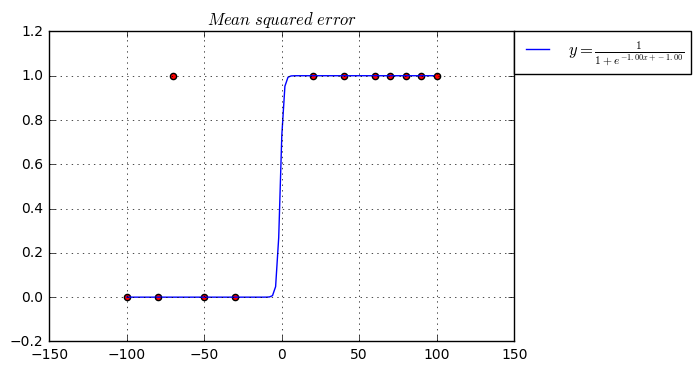

/home/stepan/programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/stepan/programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in true_divide


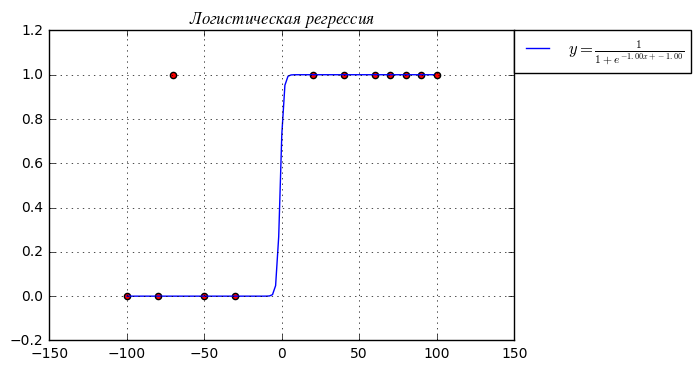

In [121]:
X = [-100,-80,-50,-30,60,20,40,90,70,80, -70,100]
Y = [0,0,0,0, 1,1,1,1,1,1,1,1]
plot(find_MSE, X, Y, '$Mean \ squared \ error$')
plot(find_sigma, X, Y, '$Логистическая \ регрессия$')